In [64]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [114]:
# import datasets
df = pd.read_csv('data/prevalence-of-dementias.csv')
df2 = pd.read_csv('data/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
df2.head()


,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
0,Afghanistan,AFG,2010,0.21
1,Afghanistan,AFG,2015,0.21
2,Afghanistan,AFG,2018,0.21
3,Albania,ALB,2000,6.57
4,Albania,ALB,2005,7.65


In [123]:
# saving a list of all african countries
african_countries = [
    "Algeria",
    "Angola",
    "Benin",
    "Botswana",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Comoros",
    "Democratic Republic of the Congo",
    "Djibouti",
    "Egypt",
    "Equatorial Guinea",
    "Eritrea",
    "Eswatini",
    "Ethiopia",
    "Gabon",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Ivory Coast",
    "Kenya",
    "Lesotho",
    "Liberia",
    "Libya",
    "Madagascar",
    "Malawi",
    "Mali",
    "Mauritania",
    "Mauritius",
    "Morocco",
    "Mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Republic of the Congo",
    "Rwanda",
    "Sao Tome and Principe",
    "Senegal",
    "Seychelles",
    "Sierra Leone",
    "Somalia",
    "South Africa",
    "South Sudan",
    "Sudan",
    "Tanzania",
    "Togo",
    "Tunisia",
    "Uganda",
    "Zambia",
    "Zimbabwe"
]


In [93]:
# list saved in a dataframe
countries = pd.DataFrame(african_countries, columns=['Countries'])
countries.head(5)

,Countries
0,Algeria
1,Angola
2,Benin
3,Botswana
4,Burkina Faso


In [124]:
# Column name in DataFrames to filter

# We are filtering the datasets with data between 2005-2020
column_to_filter = 'Year'  

# Values to filter by
Years = []
for year in range (2005, 2020):
    Years.append(year)

# Filter the DataFrame
filtered_df = df[df[column_to_filter].isin(Years)]
filtered_df2 = df2[df2[column_to_filter].isin(Years)]

In [125]:
# filtering the dataset with the list of afircan countries

# NOTE: some countries might be missing, this will be reviewed later

dementia_africa = filtered_df[filtered_df['Entity'].isin(countries['Countries'])]
alcohol_africa = filtered_df2[filtered_df2['Entity'].isin(countries['Countries'])]

In [130]:
# The dataset is then pivoted into a wide format and saved as csv files
# - wanted to have a better view of the nature of the dataset, and particularly extract
# a single column from the dementia dataset

# NOTE # this is probably the long way, I should have just dropped the column that's not age standardized

# dementia_africa.head(5)
dementia_wide = dementia_africa.pivot(
    index='Entity',
    columns='Year',
    values="Current number of cases of alzheimer's disease and other dementias per 100,000 people, in both sexes aged age-standardized")
# dementia_wide.head(5)
# dementia_wide.to_csv('dementia_wide', index=True)

alcohol_africa.head(5)
alcohol_wide = alcohol_africa.pivot(
    index='Entity',
    columns='Year',
    values="Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)")
# alcohol_wide.head(5)
# alcohol_wide.to_csv('alcohol_wide', index=True)


In [131]:

## Re converted to long fromat
alcohol_wide = pd.read_csv('data/alcohol_wide')
long_df = pd.melt(
    alcohol_wide, 
    id_vars='Entity', 
    var_name='Year', 
    value_name='alcohol_consumption')
long_df.head()


,Entity,Year,alcohol_consumption
0,Algeria,2005,0.81
1,Angola,2005,4.89
2,Benin,2005,2.23
3,Botswana,2005,9.61
4,Burkina Faso,2005,9.19


In [135]:
## Re converted to long fromat
dementia_wide = pd.read_csv('data/dementia_wide')
d_long_df = pd.melt(
    dementia_wide, 
    id_vars='Entity', 
    var_name='Year', 
    value_name='Cases_100,000_people')
d_long_df.head()

,Entity,Year,"Cases_100,000_people"
0,Algeria,2005,0.763745
1,Angola,2005,0.669900
2,Benin,2005,0.461360
3,Botswana,2005,0.604392
4,Burkina Faso,2005,0.505257


In [136]:
combined_df = pd.merge(long_df, d_long_df[['Cases_100,000_people']], 
                       left_index=True, right_index=True)

# combined_df['Year'] = pd.to_datetime(combined_df['Year'], format='%Y')
combined_df.head()

,Entity,Year,alcohol_consumption,"Cases_100,000_people"
0,Algeria,2005,0.81,0.763745
1,Angola,2005,4.89,0.669900
2,Benin,2005,2.23,0.461360
3,Botswana,2005,9.61,0.604392
4,Burkina Faso,2005,9.19,0.505257


In [134]:
# saving combined file to a csv format


# combined_df.to_csv('combined_df', index=False)

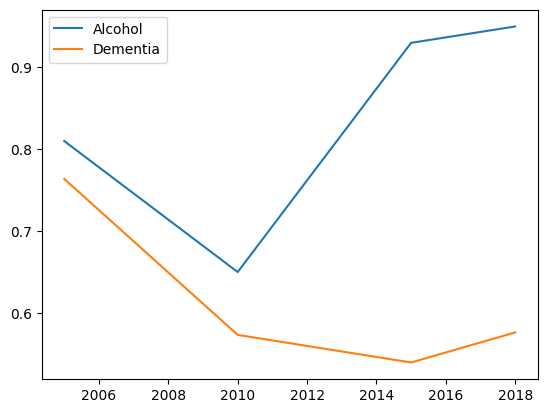

In [137]:
combined_df = pd.read_csv('data/combined_df')

country_to_plot = 'Algeria' 

# Filter the DataFrame for the specific country
country_df = combined_df[combined_df['Entity'] == country_to_plot]

plt.plot(country_df['Year'], country_df['alcohol_consumption'], label = 'Alcohol')
plt.plot(country_df['Year'], country_df['Cases_100,000_people'], label = 'Dementia')

plt.legend()

plt.show()

In [140]:
df = combined_df
# Initialize the figure
fig = go.Figure()

# Filter data for the USA
country_data = df[df['Entity'] == 'Kenya']

# Initialize the figure
fig = go.Figure()

# Add traces for each variable
for variable in ['alcohol_consumption', 'Cases_100,000_people']:  # Add more variables if needed
    fig.add_trace(go.Scatter(
        x=country_data['Year'], 
        y=country_data[variable], 
        mode='lines', 
        name=f"{variable}"))

# Update layout
fig.update_layout(
    title="Data for Different Countries",
    xaxis_title="Year",
    yaxis_title="Value",
    # legend_title="Country - Variable"
)

